# SNE and T-SNE

SNE is one of a number of different method within the category of manifold learning, which aim to describe high-dimensonal spaces within low-dimensional manifolds. 

Steps for constructing an SNE: 
1. Convert the distances datapoints in high-dimensional space into conditional probabilities using Gaussian curve. By doing this we see the probability is high for a nearby point while it is very low for distant point.
2. We need to determine the width of the Gaussian curve as this controls the rate of probability selection.  A wide curve would suggest that many neighbring points are far away
3. Once we project the data into low-dimensonal space, we can also determine the corresponding probability between the corresponding low dimensional data
4. SNE aim to positioning the data in the lower dimensional data to minimizes the difference between probability in high dimension and the probability in low-dimension over all the datapoints using a cost function such as Kullback-Leiber(KL) divergence.

Perplexity is a selection of efectice number of neighbrs used in the comparison.it's relatively stable value is betwen 5 and 50. 

## T-SNE MNIST

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
np.random.seed(2)

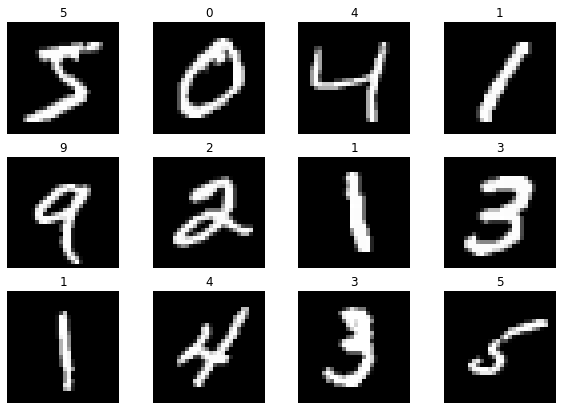

In [37]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i+1 )
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

In [26]:
model_pca = PCA(n_components=49)
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 ** 2)))

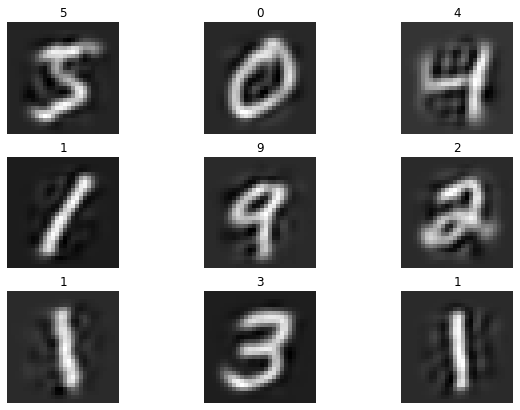

In [27]:
mnist_30comp = model_pca.transform(mnist['images']
                                   .reshape((-1, 28 ** 2)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))
plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist_30comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

In [28]:
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(random_state=0, verbose=1)

In [29]:
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 6.718s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 444.053492
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.324966
[t-SNE] KL divergence after 1000 iterations: 1.699469


In [30]:
mnist_tsne.shape

(10000, 2)

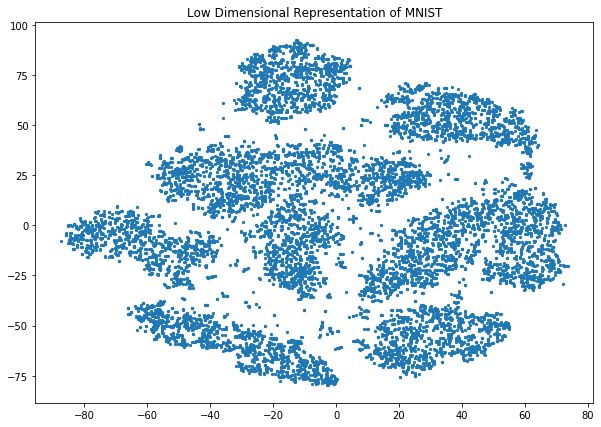

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:,0], mnist_tsne[:,1], s=5)
plt.title('Low Dimensional Representation of MNIST');

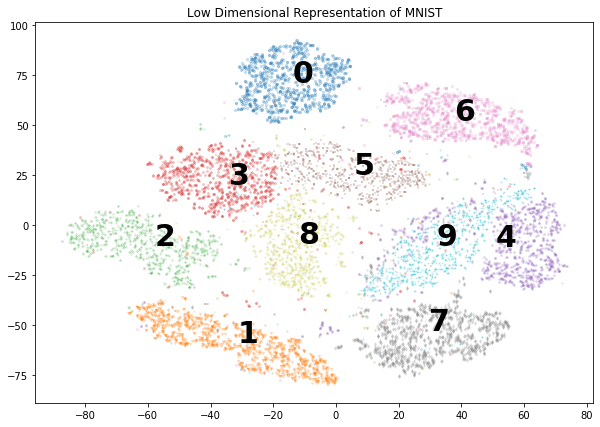

In [32]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, 
                marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 
                                     'size': 30})
plt.show()

In [45]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [46]:
threes = np.where(mnist['labels'] == 3)[0]
threes

array([   7,   10,   12,   27,   30,   44,   49,   50,   74,   86,   98,
        107,  111,  130,  135,  136,  149,  157,  179,  181,  198,  203,
        207,  215,  228,  235,  242,  250,  254,  255,  279,  281,  291,
        298,  321,  327,  330,  341,  356,  361,  392,  405,  425,  433,
        452,  459,  479,  486,  490,  495,  500,  509,  540,  546,  549,
        557,  561,  574,  581,  613,  629,  643,  645,  659,  670,  675,
        695,  715,  731,  752,  760,  767,  789,  808,  811,  840,  843,
        856,  857,  861,  867,  874,  875,  878,  890,  895,  909,  953,
        966,  975,  983,  992,  998, 1007, 1021, 1035, 1055, 1068, 1077,
       1097, 1108, 1119, 1121, 1130, 1144, 1145, 1150, 1151, 1158, 1178,
       1185, 1201, 1218, 1226, 1233, 1234, 1241, 1244, 1260, 1290, 1295,
       1312, 1315, 1317, 1320, 1336, 1341, 1348, 1351, 1357, 1378, 1409,
       1428, 1429, 1432, 1436, 1449, 1469, 1470, 1474, 1476, 1486, 1529,
       1533, 1551, 1559, 1566, 1581, 1583, 1588, 15

In [41]:
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:,0]< -49)[0]
far_threes

array([   0,   11,   14,   17,   18,   19,   21,   22,   29,   30,   32,
         34,   35,   39,   42,   43,   51,   54,   55,   56,   58,   60,
         61,   63,   66,   67,   68,   74,   76,   78,   79,   80,   98,
         99,  101,  110,  114,  116,  120,  122,  123,  128,  129,  137,
        142,  143,  144,  145,  151,  152,  183,  184,  188,  193,  227,
        229,  231,  237,  238,  239,  240,  243,  244,  245,  247,  263,
        303,  315,  319,  327,  335,  379,  385,  388,  422,  427,  431,
        432,  433,  437,  438,  439,  493,  495,  497,  498,  503,  505,
        512,  517,  552,  554,  556,  557,  560,  561,  563,  564,  567,
        569,  570,  571,  574,  579,  581,  583,  585,  588,  593,  594,
        595,  596,  598,  600,  629,  632,  633,  637,  638,  639,  641,
        642,  646,  648,  650,  652,  659,  662,  663,  666,  714,  721,
        724,  726,  729,  734,  738,  776,  777,  785,  786,  787,  789,
        795,  797,  812,  823,  825,  826,  830,  8

In [35]:
tsne_threes[far_threes]

array([[-49.48495 ,  17.583273],
       [-42.71649 ,  29.974194],
       [-39.399662,  38.016296],
       ...,
       [-55.138245,  25.840902],
       [-48.586636,  23.943556],
       [-45.145496,  34.062614]], dtype=float32)

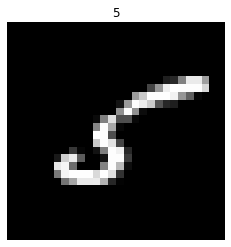

In [40]:
plt.imshow(mnist['images'][11], cmap='gray')
plt.title(mnist['labels'][11])
plt.axis('off');
plt.show()

# Perplexity

In [47]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [48]:
np.random.seed(2)

In [49]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

In [51]:
model_pca = PCA(n_components=49)
mnist_pca = model_pca.fit_transform(mnist['images'].reshape((-1, 28 ** 2)))

C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 6.132s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 223.040224
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.137100
[t-SNE] KL divergence after 1000 iterations: 1.867548
[t-SNE] Computing 91 ne

C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10000 samples in 6.692s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 443.491067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.427521
[t-SNE] KL divergence after 1000 iterations: 1.715069
[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...


C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10000 samples in 9.817s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 681.362623
[t-SNE] KL divergence after 50 iterations with early exaggeration: 69.769669
[t-SNE] KL divergence after 1000 iterations: 1.183667


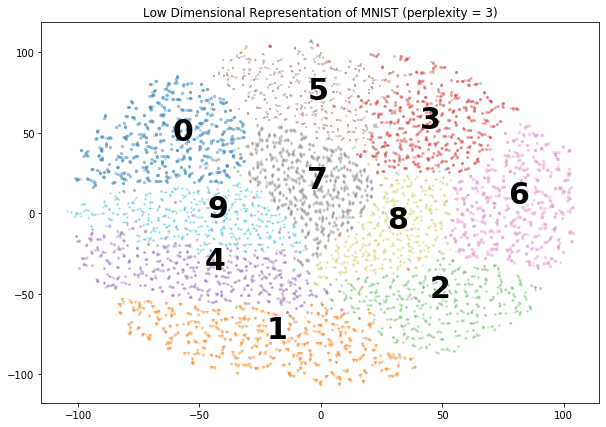

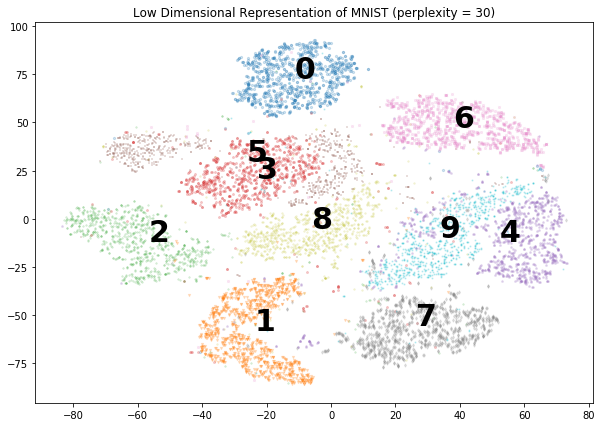

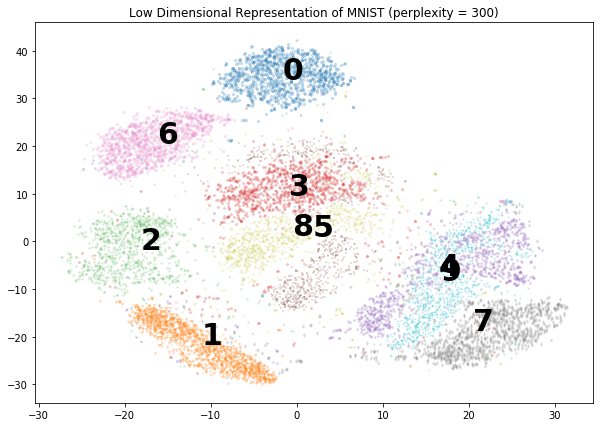

In [52]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for perp in [3, 30, 300]:
    model_tsne = TSNE(random_state=0, verbose=1, perplexity=perp)
    mnist_tsne = model_tsne.fit_transform(mnist_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of MNIST (perplexity = {perp})')
    for i in range(10):
        selections = mnist_tsne[mnist['labels'] == i]
        plt.scatter(selections[:,0], selections[:,1],
                    alpha=0.2, marker=MARKER[i], s=5)
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()